In [59]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
import warnings
warnings.filterwarnings("ignore")

# 1. Declarar antecedentes y consecuentes y universos de discurso

In [ ]:
# Variables de entrada
vertimiento = ctrl.Antecedent(np.arange(0, 36, 1), 'vertimiento')
ton_CO2 = ctrl.Antecedent(np.arange(1500, 12701, 1), 'ton_CO2')
lts_Agua = ctrl.Antecedent(np.arange(75, 901, 1), 'lts_Agua')

# Variable de salida
riesgo = ctrl.Consequent(np.arange(0, 101, 1), 'riesgo')

In [75]:
print(np.arange(-10, 11, 2))
print(np.arange(0, 101, 20))

[-10  -8  -6  -4  -2   0   2   4   6   8  10]
[  0  20  40  60  80 100]


# 2. Fuzzificar antecedentes y consecuentes

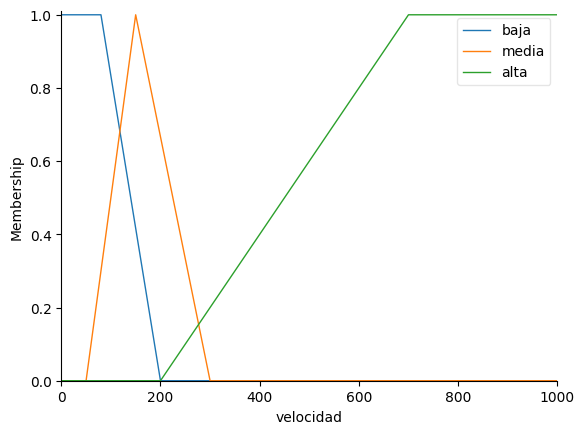

In [62]:
velocidad['baja'] = fuzz.trapmf(velocidad.universe, [0, 0, 80, 200])
velocidad['media'] = fuzz.trimf(velocidad.universe, [50, 150, 300])
velocidad['alta'] = fuzz.trapmf(velocidad.universe, [200, 700, 1000, 1000])

velocidad.view()
plt.show()

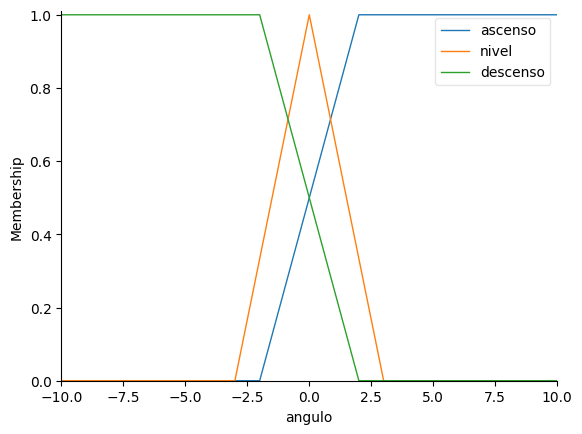

In [63]:
angulo['ascenso'] = fuzz.trapmf(angulo.universe, [-2, 2, 10, 10])
angulo['nivel'] = fuzz.trimf(angulo.universe, [-3, 0, 3])
angulo['descenso'] = fuzz.trapmf(angulo.universe, [-10, -10,-2, 2])

angulo.view()
plt.show()

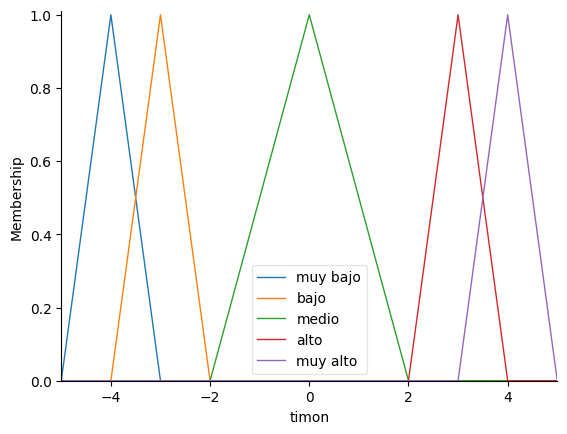

In [64]:
timon['muy bajo'] = fuzz.trimf(timon.universe, [-5, -4, -3])
timon['bajo'] = fuzz.trimf(timon.universe, [-4, -3, -2])
timon['medio'] = fuzz.trimf(timon.universe, [-2, 0, 2])
timon['alto'] = fuzz.trimf(timon.universe, [2, 3, 4])
timon['muy alto'] = fuzz.trimf(timon.universe, [3, 4, 5])

timon.view()
plt.show()

# 3. Base del conocimiento

In [65]:
regla_1 = ctrl.Rule(velocidad['alta'] & angulo['ascenso'], timon['muy alto'])
regla_2 = ctrl.Rule(velocidad['alta'] & angulo['nivel'], timon['medio'])
regla_3 = ctrl.Rule(velocidad['alta'] & angulo['descenso'], timon['muy bajo'])
regla_4 = ctrl.Rule(velocidad['media'] & angulo['ascenso'], timon['alto'])
regla_5 = ctrl.Rule(velocidad['media'] & angulo['nivel'], timon['medio'])
regla_6 = ctrl.Rule(velocidad['media'] & angulo['descenso'], timon['bajo'])
regla_7 = ctrl.Rule(velocidad['baja'] & angulo['ascenso'], timon['medio'])
regla_8 = ctrl.Rule(velocidad['baja'] & angulo['nivel'], timon['medio'])
regla_9 = ctrl.Rule(velocidad['baja'] & angulo['descenso'], timon['medio'])

In [66]:
regla_medio = ctrl.Rule(antecedent = ((velocidad['alta'] & angulo['nivel']) | (velocidad['media'] & angulo['nivel']) | (velocidad['baja'] & angulo['ascenso']) | (velocidad['baja'] & angulo['nivel']) | (velocidad['baja'] & angulo['descenso'])), consequent = timon['medio'])

# 4. Motor de inferencia

In [67]:
control_vuelo = ctrl.ControlSystem([regla_1, regla_2, regla_3, regla_4, regla_5, regla_6, regla_7, regla_8, regla_9])

# 5. Implementar el Mamdani

In [68]:
posicion_timon = ctrl.ControlSystemSimulation(control_vuelo)
posicion_timon.input['angulo'] = 1.7
posicion_timon.input['velocidad'] = 250
posicion_timon.compute()

In [69]:
posicion_timon.output['timon']

np.float64(0.695214423934832)

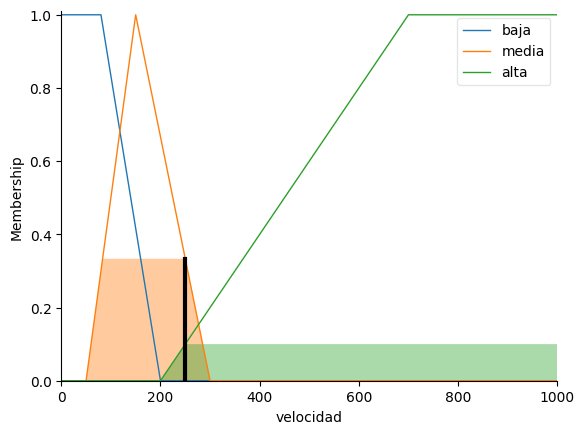

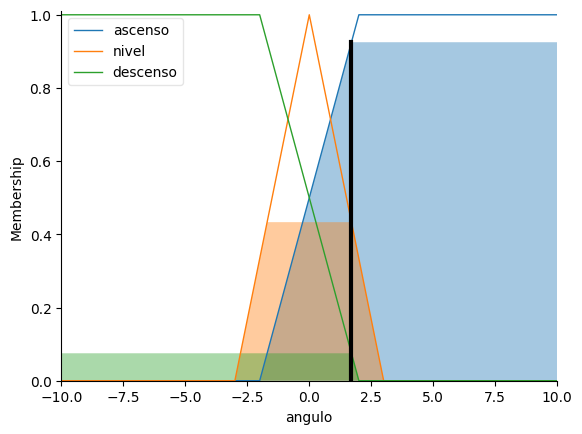

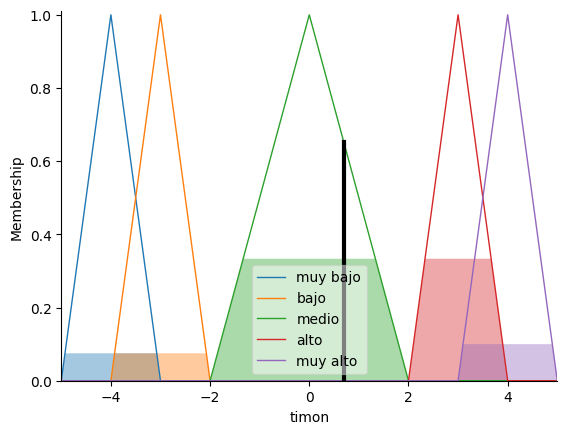

In [70]:
velocidad.view(sim=posicion_timon)
angulo.view(sim=posicion_timon)
timon.view(sim=posicion_timon)
plt.show()